In [1]:
!git clone https://github.com/prajnasb/observations.git

Cloning into 'observations'...
remote: Enumerating objects: 1638, done.
remote: Total 1638 (delta 0), reused 0 (delta 0), pack-reused 1638
Receiving objects: 100% (1638/1638), 75.94 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [2]:
!rm -R sample_data
!mv /content/observations/experiements/data /content
!rm -R /content/observations

In [3]:
!ls

data


In [4]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def inputPrepare(img_x):
  img_x = cv2.resize(img_x, (128, 128))
  return img_x/255

# dane wejsciowe z maskami na twarzy

In [6]:
files = []
for filename in os.listdir("/content/data/with_mask"):
  files.append(filename)
train_x_mask = []
train_y_mask = []
for name in files:
  img = cv2.imread("/content/data/with_mask/"+name)
  img = inputPrepare(img)
  train_x_mask.append(img)
  train_y_mask.append(np.array([1,0]))

# dane wejsciowe bez masek na twarzy

In [7]:
files = []
for filename in os.listdir("/content/data/without_mask"):
  files.append(filename)
train_x_nomask = []
train_y_nomask = []
for name in files:
  img = cv2.imread("/content/data/without_mask/"+name)
  img = inputPrepare(img)
  train_x_nomask.append(img)
  train_y_nomask.append(np.array([0,1]))

In [8]:
train_x = train_x_mask + train_x_nomask
train_y = train_y_mask + train_y_nomask
test_x = np.asarray(train_x)
test_y = np.asarray(train_y)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

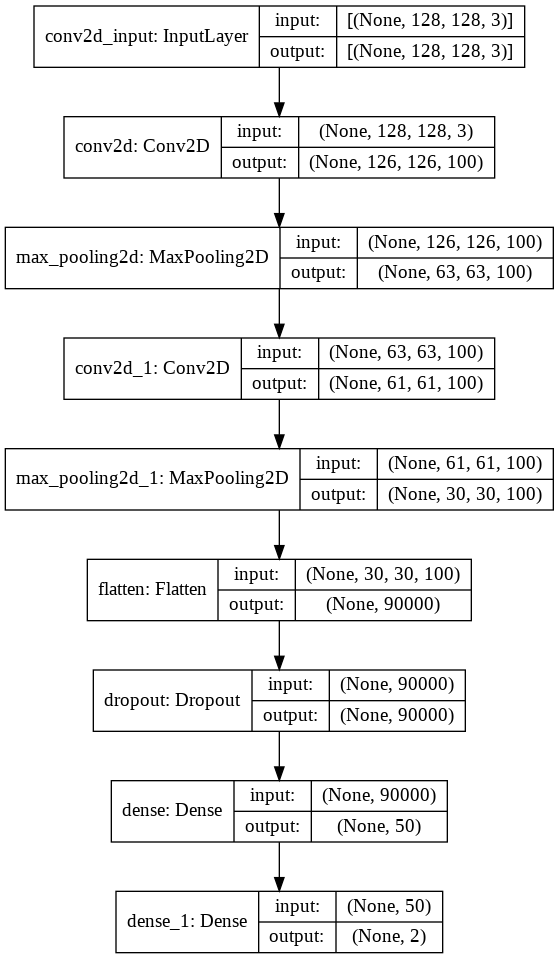

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
EPOCHS = 30
model_history = model.fit(x=test_x, y=test_y, epochs=EPOCHS, verbose=1)

Epoch 1/30
43/43 [==============================] - 4s 83ms/step - loss: 0.0843 - acc: 0.9833
Epoch 2/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0859 - acc: 0.9658
Epoch 3/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0487 - acc: 0.9840
Epoch 4/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0166 - acc: 0.9956
Epoch 5/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0051 - acc: 0.9985
Epoch 6/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0066 - acc: 0.9985
Epoch 7/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0136 - acc: 0.9964
Epoch 8/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0015 - acc: 1.0000
Epoch 9/30
43/43 [==============================] - 3s 80ms/step - loss: 0.0024 - acc: 0.9993
Epoch 10/30
43/43 [==============================] - 3s 79ms/step - loss: 0.0024 - acc: 0.9993
Epoch 11/30
43/43 [==============================] - 3s 79m

In [19]:
img_input = train_x[12]
img_input = img_input.reshape(1, img_input.shape[0], img_input.shape[1], img_input.shape[2])
model.predict(img_input)

array([[1.000000e+00, 1.037106e-15]], dtype=float32)